In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=GBP"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=GBP"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=7))


# Fetch current ETH price
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=7))



# Compute current value of my crpto

btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value

eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

btc_GBP_value = data_btc["data"]["1"]["quotes"]["GBP"]["price"]
my_btc_value_GBP = my_btc * btc_GBP_value

eth_GBP_value = data_eth["data"]["1027"]["quotes"]["GBP"]["price"]
my_eth_value_GBP = my_eth * eth_GBP_value



# Print current crypto wallet balance
print('\n')
print("My crypto balances in USD and GBP")
print(f'----------------------------'+'\n')
print(f"The current value of Aidan's {my_btc} BTC is US${my_btc_value:0.2f}")
print(f"The current value of Aidan's {my_eth} ETH is US${my_eth_value:0.2f}")
print('\n')
print(f"The current value of Aidan's {my_btc} BTC in Sterling is £{my_btc_value_GBP:0.2f}")
print(f"The current value of Aidan's {my_eth} ETH is Sterling is £{my_eth_value_GBP:0.2f}")

{
       "data": {
              "1": {
                     "id": 1,
                     "name": "Bitcoin",
                     "symbol": "BTC",
                     "website_slug": "bitcoin",
                     "rank": 1,
                     "circulating_supply": 18899856,
                     "total_supply": 18899856,
                     "max_supply": 21000000,
                     "quotes": {
                            "USD": {
                                   "price": 48038.0,
                                   "volume_24h": 21846383900,
                                   "market_cap": 908010994923,
                                   "percentage_change_1h": -0.757609190862655,
                                   "percentage_change_24h": -3.39027314957582,
                                   "percentage_change_7d": -2.49785870875697,
                                   "percent_change_1h": -0.757609190862655,
                                   "percent_change_24h": -3.3902731

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format

today = pd.Timestamp("2021-12-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_prices = api.get_barset(
    tickers,
    timeframe,
    limit=3
).df

# Preview DataFrame
df_prices.head()


AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-12-09 00:00:00-05:00  114.28  114.386  114.1200  114.20  8223995  468.15   
2021-12-10 00:00:00-05:00  114.37  114.510  114.2200  114.24  6263328  469.23   
2021-12-13 00:00:00-05:00  114.51  114.510  114.4608  114.49   415690  470.19   

                                                               
                               high     low   close    volume  
time                                                           
2021-12-09 00:00:00-05:00  469.6291  466.14  466.34  54963509  
2021-12-10 00:00:00-05:00  470.9000  466.51  470.72  64958435  
2021-12-13 00:00:00-05:00  470.5600  469.37  470.12   2565304

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_prices['AGG']['close'][0]
spy_close_price = df_prices['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.2
Current SPY closing price: $466.34


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23317.00
The current value of your 200 AGG shares is $22840.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value
data = [ total_crypto, total_shares]

# Create savings DataFrame
df_savings = pd.DataFrame(data, index=['Crypto','Shares'], columns=['Amount in USD'])

# Display savings DataFrame
display(df_savings)

,Amount in USD
Crypto,78458.753
Shares,46157.000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Amount in USD'>

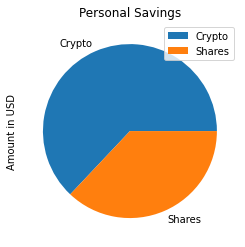

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount in USD',title='Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in this fund")
elif (total_savings == emergency_fund):
    print("Congratualtions on reaching this financial goal!")
else:
    diff = emergency_fund - total_savings
    print(f"You are ${diff} away from reaching your financial goal, keep saving!")

Congratulations! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

tickers = ["AGG", "SPY"]
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit= 1000
).df

df_stock_data = pd.concat([df_stock_data])

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_stocks_dist.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ajmlaird/monu-virt-fin-11-2021-u-c/Homework/Week 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007122,0.998728,0.990017,1.004629,0.997150,1.001684,1.004259,0.998893,1.002712,0.993760,...,0.991961,1.003744,0.996178,1.011664,1.010582,0.979426,1.014419,0.995838,1.009334,0.982489
2,1.007835,1.003157,0.994291,1.007318,0.983529,1.012229,1.005801,0.990600,1.019230,1.000818,...,0.992335,1.006494,0.992334,1.013587,1.018001,0.975434,1.010214,0.986353,1.000939,0.995663
3,1.008540,1.001063,0.983140,1.005905,0.980549,1.003485,1.009441,0.989641,1.022152,0.998406,...,1.010529,1.012776,0.994021,1.026791,1.022155,0.974993,1.018687,0.995710,1.002075,0.996792
4,1.013658,1.005753,1.002415,1.009645,0.975829,1.002488,1.009537,0.993652,1.005835,1.007795,...,1.016993,1.001605,0.990454,1.021476,1.025893,0.977918,1.008695,0.995305,1.007183,0.997530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.811685,38.042024,29.226881,53.714483,24.541281,9.420130,29.278910,12.066707,6.770302,32.078955,...,21.748865,30.385332,30.092468,12.351638,41.928998,25.267275,19.439392,16.450659,12.937711,7.158312
7557,14.783822,37.854090,28.856069,54.258988,24.408688,9.536838,29.279996,11.995894,6.796013,32.146258,...,21.773064,29.956214,30.117967,12.335193,42.457252,25.758157,19.392710,16.238326,12.933627,7.134010
7558,14.791283,38.421752,28.956869,53.941931,24.217798,9.516727,29.513658,12.085284,6.697987,32.237520,...,21.845277,30.370575,30.167925,12.305089,42.215531,26.088728,19.277467,15.875175,12.860193,7.084566
7559,14.700247,38.700738,29.305212,53.789566,24.317391,9.538315,29.334948,12.342560,6.749029,32.106033,...,21.947437,30.207422,30.430311,12.244875,42.378156,26.124626,19.154072,15.902271,12.985753,7.041130


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

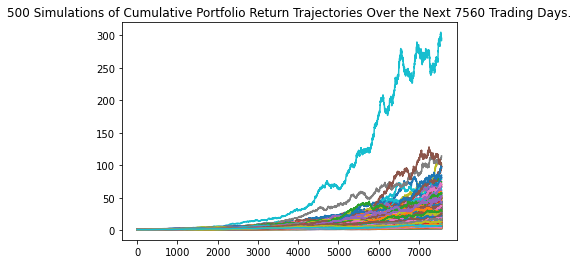

In [19]:
# Plot simulation outcomes
MC_stocks_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

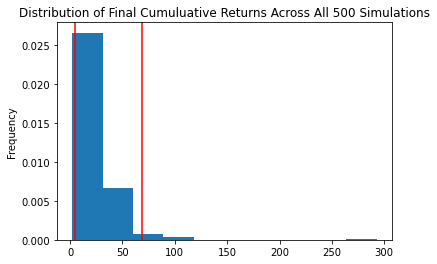

In [20]:
# Plot probability distribution and confidence intervals
MC_stocks_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_stocks_dist.summarize_cumulative_return()

# Print summary statistics
summary

count           500.000000
mean             23.056855
std              20.502735
min               1.967136
25%              10.959816
50%              18.137976
75%              29.088092
max             292.644653
95% CI Lower      4.607036
95% CI Upper     68.771304
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92140.71 and $1375426.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138211.07 and $2063139.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ajmlaird/monu-virt-fin-11-2021-u-c/Homework/Week 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003411,0.992189,1.004150,0.991866,0.995618,1.021121,0.991503,0.987675,0.988377,1.006745,...,1.007085,0.996131,0.968720,1.000153,0.994433,0.982502,0.999897,1.000458,1.010338,0.989015
2,0.996202,0.987000,1.002869,0.994298,1.004497,1.028667,1.013297,0.972691,1.002903,1.000076,...,1.022138,0.983557,0.983600,0.999990,0.978766,0.992428,0.985707,0.999811,0.993823,1.008859
3,1.005808,0.966550,1.001285,0.976057,1.011715,1.026481,0.999695,0.968529,1.024109,1.012519,...,1.026624,0.986032,0.995860,0.998373,0.981475,0.989695,0.976677,0.995791,0.997471,1.002617
4,0.993739,0.956275,0.990978,0.988025,1.003286,1.042247,1.006657,0.983445,1.028277,1.041999,...,1.020361,0.953458,0.993854,1.001014,0.971807,0.984273,0.967006,1.000790,0.992961,1.007396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.096065,2.020372,3.072144,1.736874,1.005489,1.209815,1.487443,4.263095,1.508410,2.025518,...,1.502055,1.439176,3.316993,1.982661,2.071509,1.131265,1.998375,1.942680,3.011694,3.005939
1257,1.127298,2.013255,3.083065,1.769332,1.007229,1.208778,1.500533,4.216617,1.519436,2.058873,...,1.529792,1.418303,3.352906,2.008536,2.081372,1.158103,2.020800,1.942303,3.044393,2.986151
1258,1.126138,2.070969,3.107301,1.786845,1.015583,1.204553,1.501053,4.282138,1.521298,2.091495,...,1.524863,1.424500,3.328341,2.012832,2.121042,1.166083,2.004573,1.918947,3.079631,2.983233
1259,1.130767,2.056943,3.131755,1.787004,1.017729,1.196426,1.492160,4.271781,1.524112,2.110218,...,1.541454,1.435110,3.283520,1.998132,2.129686,1.174579,2.018279,1.931388,3.113443,2.969919


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

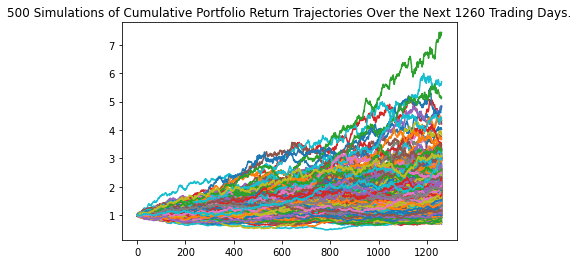

In [26]:
# Plot simulation outcomes
MC_stocks_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

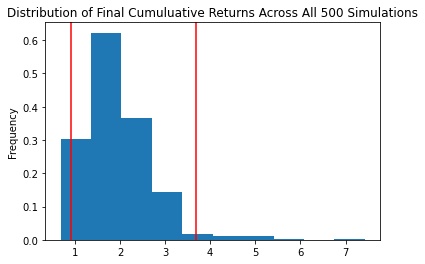

In [27]:
# Plot probability distribution and confidence intervals
MC_stocks_5.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5 = MC_stocks_5.summarize_cumulative_return()

# Print summary statistics
summary_5

count           500.000000
mean              1.951411
std               0.769183
min               0.682017
25%               1.429332
50%               1.844055
75%               2.303440
max               7.429554
95% CI Lower      0.924037
95% CI Upper      3.694135
Name: 1260, dtype: float64

In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_5[8]*initial_investment, 2)
ci_upper_five = round(summary_5[9]*initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55442.2 and $221648.09


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.3, 0.7],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ajmlaird/monu-virt-fin-11-2021-u-c/Homework/Week 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999211,0.994967,0.994468,1.000035,0.999276,0.993340,1.004769,1.003657,0.984067,0.986496,...,0.992149,0.998337,0.992057,1.001010,1.022591,0.999026,0.996187,0.996140,0.986908,0.995264
2,0.991576,1.008167,1.003120,1.017726,0.989071,0.986165,1.005718,0.990291,0.977948,0.990495,...,0.981454,1.005536,0.998844,1.001909,1.039190,0.988211,0.992975,0.991468,0.989299,0.997814
3,0.998943,1.004055,0.989296,1.018026,0.975993,1.003496,1.011713,1.000617,0.981461,0.979313,...,0.979482,0.999480,1.006233,0.998127,1.037595,0.999838,1.005438,0.983687,0.979084,1.009705
4,1.020625,1.006728,0.982610,1.026873,0.978657,1.004356,1.009448,0.997907,0.974594,0.986499,...,0.994818,0.988640,1.015967,0.994251,1.040084,1.004095,0.998013,0.980741,0.982401,0.998501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.840540,1.640695,7.301069,4.920691,2.913401,1.932750,2.631066,3.856675,2.492500,1.422322,...,1.594468,1.506475,2.593525,4.729419,2.044875,2.634879,2.722970,4.280937,4.988209,3.317177
2517,2.867346,1.617381,7.289675,4.881010,2.925942,1.899479,2.646244,3.935043,2.471079,1.440614,...,1.598891,1.495957,2.577104,4.801473,2.025604,2.646294,2.738144,4.307418,5.033363,3.340107
2518,2.851651,1.625410,7.330628,4.876096,2.897079,1.911385,2.701639,3.913398,2.492112,1.447358,...,1.612836,1.488504,2.573922,4.739087,2.010801,2.665478,2.732579,4.280363,5.074968,3.369638
2519,2.857837,1.628572,7.307717,4.835398,2.886937,1.926210,2.666337,3.895672,2.462807,1.450776,...,1.619349,1.508965,2.592513,4.731242,1.984822,2.685379,2.753704,4.295560,5.053339,3.382478


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

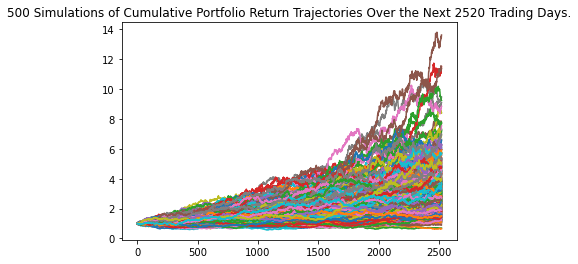

In [32]:
# Plot simulation outcomes
MC_stocks_10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

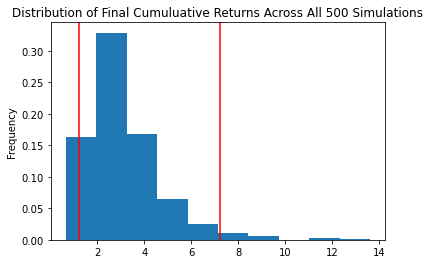

In [33]:
# Plot probability distribution and confidence intervals
MC_stocks_10.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10 = MC_stocks_10.summarize_cumulative_return()

# Print summary statistics
summary_10

count           500.000000
mean              3.136644
std               1.614101
min               0.655574
25%               2.037116
50%               2.797716
75%               3.753544
max              13.622350
95% CI Lower      1.230113
95% CI Upper      7.219493
Name: 2520, dtype: float64

In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary[8]*initial_investment, 2)
ci_upper_ten = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $276422.14 and $4126278.25


### One year retirement option

In [39]:
MC_stocks_one = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*1
)



In [40]:
MC_stocks_one.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/ajmlaird/monu-virt-fin-11-2021-u-c/Homework/Week 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004796,0.998204,0.992676,1.009416,1.009746,1.014649,0.990211,1.015435,0.996704,1.014727,...,1.002035,0.991801,1.029127,1.008629,0.999007,0.993959,0.999755,1.000974,1.020985,1.013072
2,1.014494,0.992870,0.987195,1.000097,0.997314,1.004571,0.994809,1.026453,0.999700,1.026101,...,1.000465,0.983906,1.045441,1.012015,1.001745,0.991990,1.005451,1.013641,1.023072,1.003385
3,1.007545,0.971797,0.979349,0.990843,1.000193,1.019529,0.988120,1.029745,0.998691,1.030859,...,0.997746,0.983626,1.051888,0.986286,1.022180,0.977987,1.014691,1.014818,1.030058,0.987443
4,1.020694,0.963909,0.986748,1.007242,1.001582,1.019594,0.990236,1.034949,0.998629,1.011720,...,0.995705,0.969337,1.043360,0.993165,1.020312,0.979219,1.029015,1.030254,1.012115,0.967491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.506964,0.929020,1.105026,1.176754,1.083944,1.108238,1.036944,1.243223,0.808153,1.098364,...,1.069843,1.063715,1.120043,1.171721,0.880902,0.934445,1.118536,1.039860,1.224431,1.255411
249,1.489345,0.923785,1.096529,1.189169,1.094671,1.121911,1.026703,1.239006,0.805483,1.091416,...,1.088726,1.071187,1.115274,1.180029,0.883661,0.923209,1.119338,1.021420,1.220725,1.250864
250,1.488506,0.946122,1.114090,1.195630,1.097980,1.113153,1.030902,1.235977,0.804575,1.081243,...,1.079475,1.061528,1.109447,1.181343,0.885604,0.920643,1.121559,1.026818,1.213736,1.247900
251,1.484096,0.953455,1.112218,1.192676,1.089047,1.113643,1.043223,1.222344,0.806641,1.082837,...,1.088384,1.081950,1.100067,1.172746,0.873315,0.919694,1.117627,1.020689,1.205302,1.233502


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

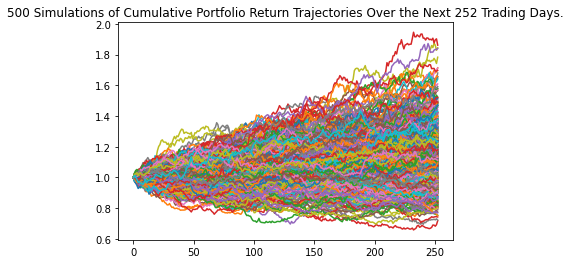

In [41]:
MC_stocks_one.plot_simulation()

In [42]:
summary_one = MC_stocks_10.summarize_cumulative_return()
summary_one

count           500.000000
mean              3.136644
std               1.614101
min               0.655574
25%               2.037116
50%               2.797716
75%               3.753544
max              13.622350
95% CI Lower      1.230113
95% CI Upper      7.219493
Name: 2520, dtype: float64

In [43]:
initial_investment = 60000
ci_lower_one = round(summary[8]*initial_investment, 2)
ci_upper_one = round(summary[9]*initial_investment, 2)
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next year will end within in the range of $276422.14 and $4126278.25
